In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
from sklearn.datasets import make_blobs

In [14]:
X,y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)

In [26]:
X

array([[ 1.41281595,  1.5303347 ],
       [ 1.81336135,  1.6311307 ],
       [ 1.43289271,  4.37679234],
       [ 1.87271752,  4.18069237],
       [ 2.09517785,  1.0791468 ],
       [ 2.73890793,  0.15676817],
       [ 3.18515794,  0.08900822],
       [ 2.06156753,  1.96918596],
       [ 2.03835818,  1.15466278],
       [-0.04749204,  5.47425256],
       [ 1.71444449,  5.02521524],
       [ 0.22459286,  4.77028154],
       [ 1.06923853,  4.53068484],
       [ 1.53278923,  0.55035386],
       [ 1.4949318 ,  3.85848832],
       [ 1.1641107 ,  3.79132988],
       [ 0.74387399,  4.12240568],
       [ 2.29667251,  0.48677761],
       [ 0.44359863,  3.11530945],
       [ 0.91433877,  4.55014643],
       [ 1.67467427,  0.68001896],
       [ 2.26908736,  1.32160756],
       [ 1.5108885 ,  0.9288309 ],
       [ 1.65179125,  0.68193176],
       [ 2.49272186,  0.97505341],
       [ 2.33812285,  3.43116792],
       [ 0.67047877,  4.04094275],
       [-0.55552381,  4.69595848],
       [ 2.16172321,

In [27]:
X[:,0]

array([ 1.41281595,  1.81336135,  1.43289271,  1.87271752,  2.09517785,
        2.73890793,  3.18515794,  2.06156753,  2.03835818, -0.04749204,
        1.71444449,  0.22459286,  1.06923853,  1.53278923,  1.4949318 ,
        1.1641107 ,  0.74387399,  2.29667251,  0.44359863,  0.91433877,
        1.67467427,  2.26908736,  1.5108885 ,  1.65179125,  2.49272186,
        2.33812285,  0.67047877, -0.55552381,  2.16172321,  2.09680487,
        2.18023251,  0.43899014,  1.24258802,  0.00793137,  1.89593761,
        1.868336  ,  2.13141478,  1.06269622,  2.33466499,  0.669787  ,
        1.07714851,  1.54632313,  1.56737975,  1.35617762,  1.00372519,
        1.29297652,  2.94821884,  0.3471383 ,  2.76253526,  0.76752279])

In [28]:
X[:,1]

array([ 1.5303347 ,  1.6311307 ,  4.37679234,  4.18069237,  1.0791468 ,
        0.15676817,  0.08900822,  1.96918596,  1.15466278,  5.47425256,
        5.02521524,  4.77028154,  4.53068484,  0.55035386,  3.85848832,
        3.79132988,  4.12240568,  0.48677761,  3.11530945,  4.55014643,
        0.68001896,  1.32160756,  0.9288309 ,  0.68193176,  0.97505341,
        3.43116792,  4.04094275,  4.69595848,  0.6565951 ,  3.7174206 ,
        1.48364708,  4.53592883,  4.50399192,  4.17614316,  5.18540259,
        0.93136287,  1.13885728,  5.17635143, -0.02408255,  3.59540802,
        1.17533301,  4.212973  , -0.1381059 ,  1.43815955,  4.19147702,
        1.47930168,  2.03519717,  3.45177657,  0.78970876,  4.39759671])

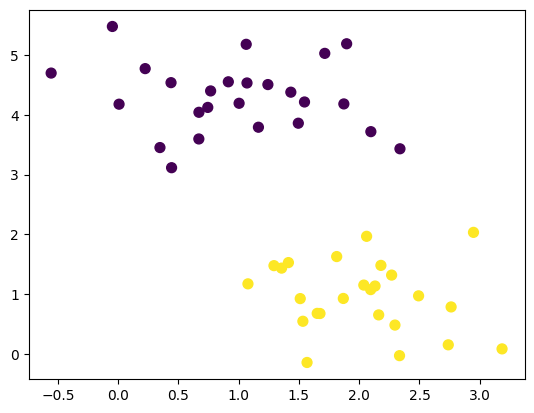

In [16]:
plt.scatter(X[:,0],X[:,1],c=y,s=50)

In [17]:
from sklearn.svm import SVC

In [21]:
model = SVC(kernel='linear',C=1)
model.fit(X,y)

SVC(C=1, kernel='linear')

In [40]:
def plot_svc_decision_function(model,ax=None,plot_support=True):


  if ax is None:
    ax = plt.gca() # Draw a plot

  # x and y axis limits of the plot
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()


  # create grid to evaluate model
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)


  # plot decision boundary and margins
  ax.contour(X, Y, P,
               levels=[-1, 0, 1], alpha=0.5)


# plot support vectors
  if plot_support:
      ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1]);
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

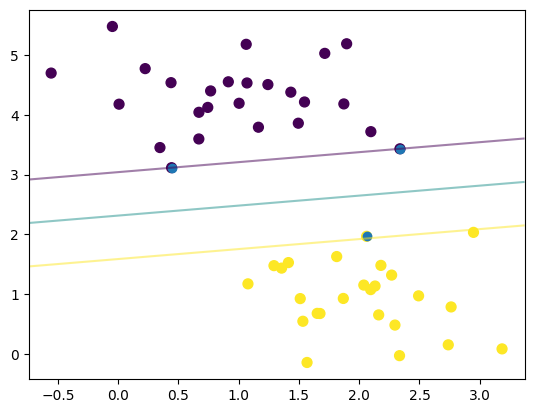

In [41]:
plt.scatter(X[:,0],X[:,1],c=y,s=50)
plot_svc_decision_function(model)

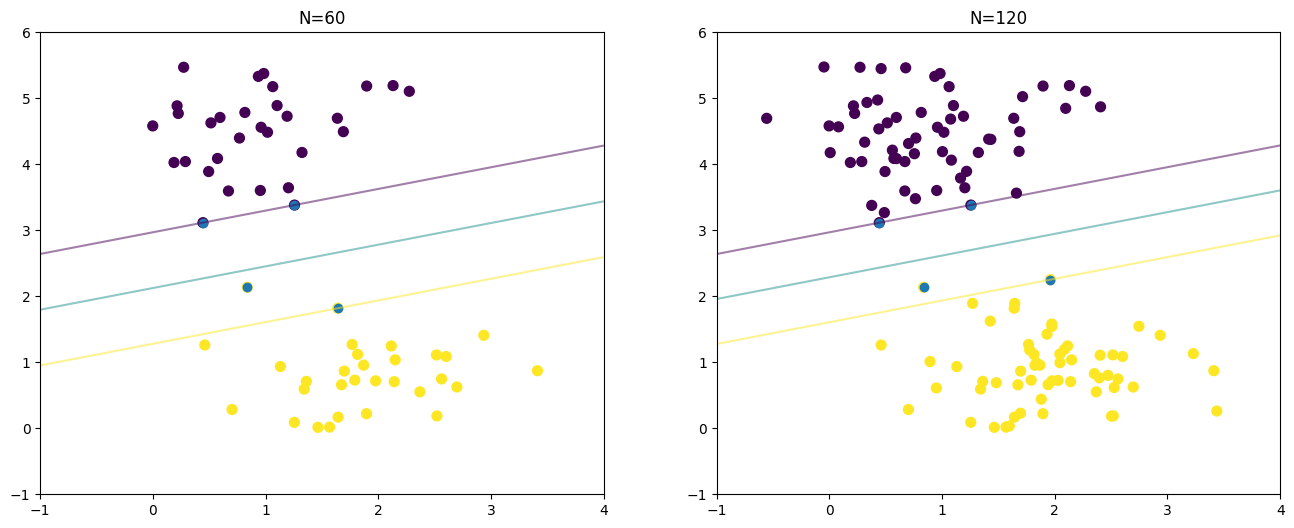

In [43]:
def plot_svm(N=10,ax=None):
  X,y = make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.60)

  X = X[:N]
  y = y[:N]
  model = SVC(kernel='linear')
  model.fit(X,y)

  ax = ax or plt.gca()
  ax.scatter(X[:,0],X[:,1],c=y,s=50)
  ax.set_xlim(-1,4)
  ax.set_ylim(-1,6)
  plot_svc_decision_function(model,ax)


fig,ax = plt.subplots(1,2,figsize=(16,6))
for axi,N in zip(ax,[60,120]):
  plot_svm(N,axi)
  axi.set_title('N={0}'.format(N))

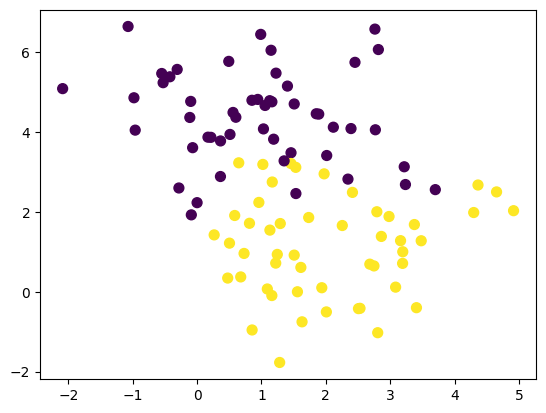

In [44]:
X,y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=1.2)
plt.scatter(X[:,0],X[:,1],c=y,s=50)

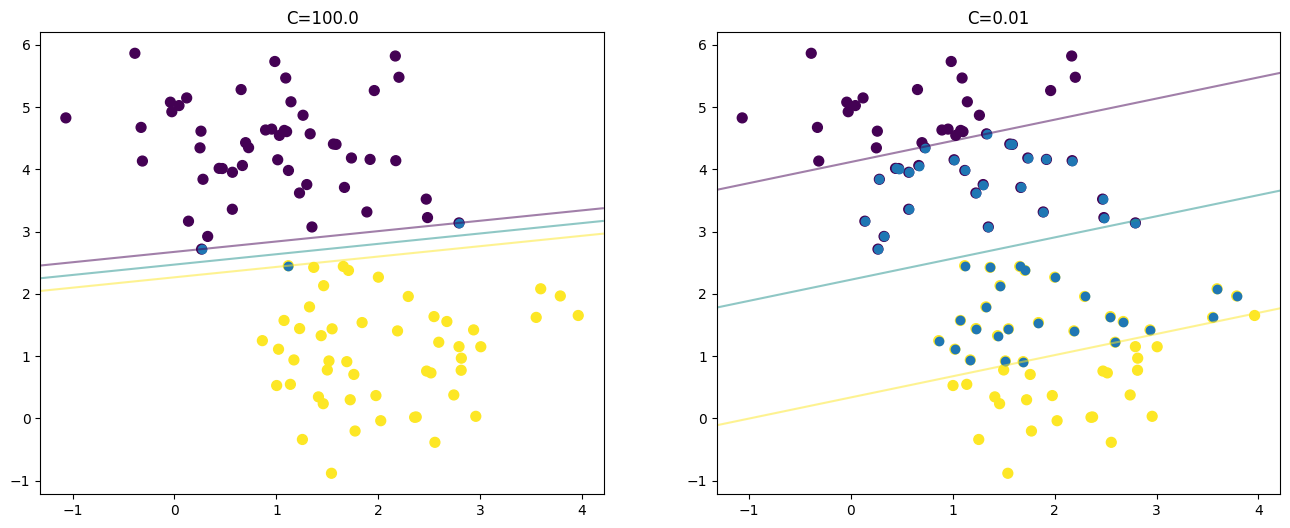

In [49]:
X,y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.8)

fig,ax = plt.subplots(1,2,figsize=(16,6))

for axi,C in zip(ax,[100.0,0.01]):
  model = SVC(kernel='linear',C=C).fit(X,y)
  axi.scatter(X[:,0],X[:,1],c=y,s=50)
  plot_svc_decision_function(model,axi)
  axi.set_title('C={0}'.format(C))